In [65]:
import datetime
import mysql.connector
from sshtunnel import SSHTunnelForwarder
from unidecode import unidecode
import time
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn import preprocessing
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# SQL Connection Setting
sql_hostname = '127.0.0.1'
sql_username = 'RedditIO'
sql_password = 'DataX123.'
sql_main_database = 'reddit'
sql_port = 3306
ssh_host = 'stock.podor.ca'
ssh_user = 'root'
ssh_passwd = 'DataX123.'
ssh_port = 22
sql_ip = '1.1.1.1.1'


In [88]:


with SSHTunnelForwarder(
        (ssh_host, ssh_port),
        ssh_username=ssh_user,
        ssh_password=ssh_passwd,
        remote_bind_address=(sql_hostname, sql_port)) as tunnel:

    conn = mysql.connector.connect(host='127.0.0.1', user=sql_username,
            passwd=sql_password, db=sql_main_database,
            port=tunnel.local_bind_port)

    mycursor = conn.cursor()


    sqlTableInit = """SELECT DATE(postTime) ,AVG(sentiment), count(sentiment) FROM reddit_data.reddit_data_sentiment7
     WHERE body LIKE '%GME%'
    OR body LIKE '%game stop%'
    GROUP BY DATE(postTime)
    ;"""

    mycursor.execute(sqlTableInit)
    
    myresult = mycursor.fetchall()
    
    dayCount = []
    senCount = []
    print(x)
    for x in myresult:
        if x[0].weekday() < 5:
            print(x)
            dayCount.append(x[2])
            senCount.append(x[1])
    
    conn.close()



(datetime.date(2021, 4, 2), Decimal('0.16044731'), 93)
(datetime.date(2021, 5, 14), Decimal('0.08674656'), 189)
(datetime.date(2021, 5, 13), Decimal('0.10991319'), 144)
(datetime.date(2021, 5, 12), Decimal('0.01788741'), 143)
(datetime.date(2021, 5, 11), Decimal('0.15260333'), 240)
(datetime.date(2021, 5, 10), Decimal('0.07461743'), 109)
(datetime.date(2021, 5, 7), Decimal('0.08789662'), 148)
(datetime.date(2021, 5, 6), Decimal('0.05299020'), 786)
(datetime.date(2021, 5, 5), Decimal('0.11171441'), 111)
(datetime.date(2021, 5, 4), Decimal('0.08604845'), 97)
(datetime.date(2021, 5, 3), Decimal('0.13413366'), 101)
(datetime.date(2021, 4, 30), Decimal('0.15738033'), 122)
(datetime.date(2021, 4, 29), Decimal('0.17244142'), 169)
(datetime.date(2021, 4, 28), Decimal('0.17036016'), 123)
(datetime.date(2021, 4, 27), Decimal('0.13346318'), 402)
(datetime.date(2021, 4, 26), Decimal('0.01504438'), 178)
(datetime.date(2021, 4, 23), Decimal('0.06851892'), 185)
(datetime.date(2021, 4, 22), Decimal('0

In [67]:
dayCount

[189,
 144,
 143,
 240,
 109,
 148,
 786,
 111,
 97,
 101,
 122,
 169,
 123,
 402,
 178,
 185,
 152,
 125,
 205,
 767,
 286,
 348,
 397,
 425,
 389,
 370,
 298,
 740]

In [85]:
# Stocks interested
tickers = ["GME"]

# Get Stock Info from Yahoo
multpl_stocks = web.get_data_yahoo(tickers,
start = "2021-04-03",
end = "2021-05-15")

GMEPrice = multpl_stocks['Adj Close']

timeX = GMEPrice.index.values

In [86]:
multpl_stocks

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,GME,GME,GME,GME,GME,GME
Date,,,,,,
2021-04-05,186.949997,186.949997,195.000000,164.809998,171.000000,14070500
2021-04-06,184.500000,184.500000,192.000000,183.559998,185.210007,6218300
2021-04-07,177.970001,177.970001,184.500000,176.110001,183.220001,4768300
2021-04-08,170.259995,170.259995,185.880005,164.300003,185.880005,10047400
2021-04-09,158.360001,158.360001,171.580002,153.000000,169.699997,9442000
2021-04-12,141.089996,141.089996,163.899994,135.009995,158.110001,16683600
2021-04-13,140.990005,140.990005,145.380005,132.000000,141.880005,6806900
2021-04-14,166.529999,166.529999,174.089996,143.000000,143.570007,21138100


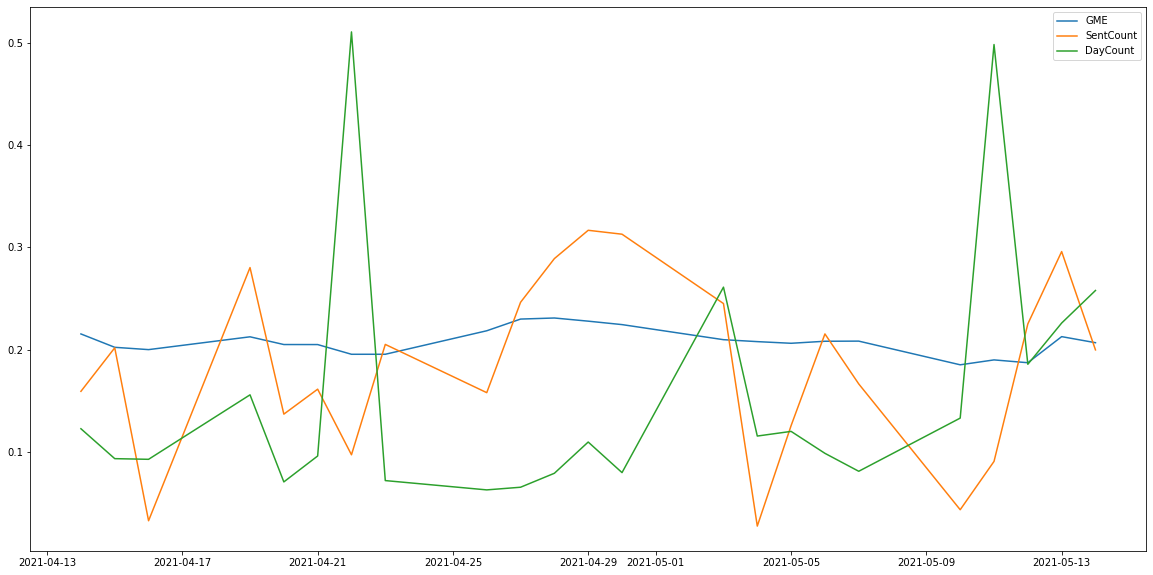

In [61]:
plt.figure(figsize=(20, 10))

#normalized_X = preprocessing.normalize(X)

normalizedP = preprocessing.normalize([multpl_stock_daily_returns[t].values])[0][0:23]
normalizedS = preprocessing.normalize([senCount])[0][0:23]
normalizedD = preprocessing.normalize([dayCount])[0][0:23]
ScaleP = preprocessing.scale([multpl_stock_daily_returns[t].values])[0][0:23]
ScaleS = preprocessing.scale([senCount])[0][0:23]
ScaleD = preprocessing.scale([dayCount])[0][0:23]

plt.plot(timeX,normalizedP,label = 'GME')    
plt.plot(timeX,normalizedS,label='SentCount')
plt.plot(timeX,normalizedD,label='DayCount')

plt.legend()
plt.show()

In [87]:
model = linear_model.LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(senCount, GMEPrice, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [29, 30]

In [45]:
senDayCount=np.array(senCount)*np.array(dayCount)